In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
"""
С помощью инструментов из пакета lifetimes строим предсказание с учетом истории действий пользователей.

"""

'\nС помощью пакета lifetimes предсказываем\n'

In [40]:
data = pd.read_csv('AN-825.csv')
data

,user_hash,user_age,edu_action_dts_diff
0,1337673019693833145,44948896,"[75,50,48,31,111,55,2241750,45,39,69,318,88,55..."
1,12399224692537823609,18075929,"[38364,107,727,159,309,180,16,229,168,148,262,..."
2,5048662895936071839,71747113,"[43,21]"
3,5559178310857390024,41381466,"[35,172,118]"
4,13199674104569162400,45961826,"[214,223,63]"
...,...,...,...
244848,11428639955678375885,44833916,"[55,396,135,41,58,61,50,33,19,35,1388,31,53,13..."
244849,18012949507887797844,43032189,"[42,34,57]"
244850,6824619557279793970,38895754,"[116,110,46,56]"
244851,11808724736265319250,7516504,"[243,154,180,53,144,64,59,158,1715,53,18,52,14..."


In [41]:
def make_list_from_string(x: str, type_=str) -> np.array:
    x = x[1:-1]
    return np.array([i for i in x.split(',')]).astype(type_)

data['edu_action_dts_diff'] = data['edu_action_dts_diff'].apply(make_list_from_string, type_=int)

In [42]:
data['number_of_breaks'] = data.edu_action_dts_diff.apply(len)
data['sum_of_breaks'] = data.edu_action_dts_diff.apply(np.sum)
data['last_break'] = data.user_age - data.sum_of_breaks
data

,user_hash,user_age,edu_action_dts_diff,number_of_breaks,sum_of_breaks,last_break
0,1337673019693833145,44948896,"[75, 50, 48, 31, 111, 55, 2241750, 45, 39, 69,...",469,4992936,39955960
1,12399224692537823609,18075929,"[38364, 107, 727, 159, 309, 180, 16, 229, 168,...",47,219259,17856670
2,5048662895936071839,71747113,"[43, 21]",2,64,71747049
3,5559178310857390024,41381466,"[35, 172, 118]",3,325,41381141
4,13199674104569162400,45961826,"[214, 223, 63]",3,500,45961326
...,...,...,...,...,...,...
244848,11428639955678375885,44833916,"[55, 396, 135, 41, 58, 61, 50, 33, 19, 35, 138...",111,84347,44749569
244849,18012949507887797844,43032189,"[42, 34, 57]",3,133,43032056
244850,6824619557279793970,38895754,"[116, 110, 46, 56]",4,328,38895426
244851,11808724736265319250,7516504,"[243, 154, 180, 53, 144, 64, 59, 158, 1715, 53...",215,1741635,5774869


In [43]:
data['recency'] = data.user_age - data.last_break
data['frequency'] = data.number_of_breaks 
data

,user_hash,user_age,edu_action_dts_diff,number_of_breaks,sum_of_breaks,last_break,recency,frequency
0,1337673019693833145,44948896,"[75, 50, 48, 31, 111, 55, 2241750, 45, 39, 69,...",469,4992936,39955960,4992936,469
1,12399224692537823609,18075929,"[38364, 107, 727, 159, 309, 180, 16, 229, 168,...",47,219259,17856670,219259,47
2,5048662895936071839,71747113,"[43, 21]",2,64,71747049,64,2
3,5559178310857390024,41381466,"[35, 172, 118]",3,325,41381141,325,3
4,13199674104569162400,45961826,"[214, 223, 63]",3,500,45961326,500,3
...,...,...,...,...,...,...,...,...
244848,11428639955678375885,44833916,"[55, 396, 135, 41, 58, 61, 50, 33, 19, 35, 138...",111,84347,44749569,84347,111
244849,18012949507887797844,43032189,"[42, 34, 57]",3,133,43032056,133,3
244850,6824619557279793970,38895754,"[116, 110, 46, 56]",4,328,38895426,328,4
244851,11808724736265319250,7516504,"[243, 154, 180, 53, 144, 64, 59, 158, 1715, 53...",215,1741635,5774869,1741635,215


In [44]:
# print(data.sort_values(by='predicted_purchases'))

In [45]:
data_action = pd.read_csv(r'C:\Users\Katerina\Питонячье\Diploma\AN-996.csv')
data_action

,dt,user_hash,action
0,2021-08-04 05:17:21,4766523093487740533,abandoned_step
1,2021-08-04 09:57:32,8844031830567918474,abandoned_step
2,2021-08-04 13:43:11,9597316936381557906,abandoned_step
3,2021-08-04 14:44:54,6441677487337749613,abandoned_step
4,2021-08-04 15:12:24,1538309979517857225,abandoned_step
...,...,...,...
25504895,2021-12-30 17:45:35,9037027244877101543,viewed_step
25504896,2021-12-30 17:45:38,17267855088208330080,viewed_step
25504897,2021-12-30 17:45:40,12253945569312787381,viewed_step
25504898,2021-12-30 17:45:41,12693713996304919558,viewed_step


In [46]:
data_action.action.value_counts()

viewed_step                            7528052
completed_step                         5586677
completed_submission                   4976386
failed_submission                      4310122
completed_topic                         660495
created_like                            512168
skipped_topic                           369052
ide_oauth_authorized                    344173
created_comment                         194558
created_subscription                    147591
completed_stage                         114381
skipped_predicted_topic                 107313
registered_user                          99761
selected_track                           95446
selected_project                         89628
completed_predicted_topic                60004
skipped_step                             46836
abandoned_step                           43589
changed_project                          42553
completed_diagnostics                    40693
changed_track                            37961
verified_pred

In [49]:
from lifetimes.utils import summary_data_from_transaction_data

data_lt = summary_data_from_transaction_data(data_action, 'user_hash', 'dt', freq='D')
data_lt

,frequency,recency,T
user_hash,,,
42657618409810,4.0,6.0,164.0
463703604077566,2.0,5.0,73.0
747758301628568,0.0,0.0,171.0
804685448957146,0.0,0.0,23.0
1075309492672165,1.0,1.0,130.0
...,...,...,...
18445749679073296072,0.0,0.0,172.0
18446108283012682715,0.0,0.0,59.0
18446110790866886389,0.0,0.0,157.0


In [50]:
data_action[data_action['user_hash'] == 804685448957146]

,dt,user_hash,action
7180240,2022-01-06 15:36:59,804685448957146,completed_diagnostics
7180610,2022-01-06 15:46:12,804685448957146,completed_predicted_topic
7198428,2022-01-06 15:33:19,804685448957146,completed_step
7198429,2022-01-06 15:33:20,804685448957146,completed_step
7198447,2022-01-06 15:33:55,804685448957146,completed_step
7198448,2022-01-06 15:33:54,804685448957146,completed_step
7198462,2022-01-06 15:34:12,804685448957146,completed_step
7198463,2022-01-06 15:34:11,804685448957146,completed_step
7198532,2022-01-06 15:35:48,804685448957146,completed_step
7198533,2022-01-06 15:35:50,804685448957146,completed_step


<AxesSubplot:>

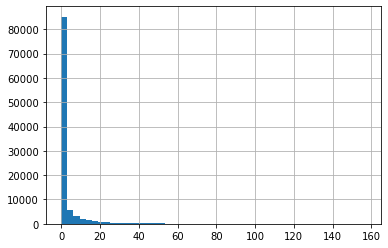

In [51]:
data_lt.frequency.hist(bins=50)

In [52]:
from lifetimes import BetaGeoFitter

bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(data['frequency'], data['recency'], data['user_age'])
print(bgf)

<lifetimes.BetaGeoFitter: fitted with 244853 subjects, a: 0.69, alpha: 70.34, b: 10.51, r: 0.30>


In [53]:
bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.304464,0.000748,0.302997,0.305931
alpha,70.342608,0.431074,69.497702,71.187514
a,0.692105,0.002786,0.686644,0.697566
b,10.513217,0.086034,10.344591,10.681843


In [54]:
t = 1 # one second
data_lt['prob_alive'] = bgf.conditional_probability_alive(data_lt['frequency'], 
                                                     data_lt['recency'], data_lt['T'])
data_lt

,frequency,recency,T,prob_alive
user_hash,,,,
42657618409810,4.0,6.0,164.0,0.135170
463703604077566,2.0,5.0,73.0,0.790725
747758301628568,0.0,0.0,171.0,1.000000
804685448957146,0.0,0.0,23.0,1.000000
1075309492672165,1.0,1.0,130.0,0.797985
...,...,...,...,...
18445749679073296072,0.0,0.0,172.0,1.000000
18446108283012682715,0.0,0.0,59.0,1.000000
18446110790866886389,0.0,0.0,157.0,1.000000


In [55]:

data_lt.sort_values('prob_alive')

,frequency,recency,T,prob_alive
user_hash,,,,
1201302997180153418,55.0,69.0,177.0,1.537356e-12
6251580414881847388,57.0,70.0,173.0,1.928986e-12
6441666318725063476,55.0,71.0,178.0,2.704910e-12
12395016337830864428,57.0,68.0,168.0,2.784844e-12
13045428644524064132,56.0,64.0,161.0,4.852289e-12
...,...,...,...,...
9565029266958056047,0.0,0.0,22.0,1.000000e+00
3706116133434453361,0.0,0.0,88.0,1.000000e+00
9564835265637892437,0.0,0.0,83.0,1.000000e+00


In [56]:
data_lt.to_csv("lifetime_prob_alive.csv", index=True)

In [57]:
t = 1 # one second
data_lt['predicted_purchases'] = bgf.conditional_expected_number_of_purchases_up_to_time(t, data_lt['frequency'], 
                                                                                         data_lt['recency'], data_lt['T'])
data_lt

,frequency,recency,T,prob_alive,predicted_purchases
user_hash,,,,,
42657618409810,4.0,6.0,164.0,0.135170,0.002482
463703604077566,2.0,5.0,73.0,0.790725,0.012705
747758301628568,0.0,0.0,171.0,1.000000,0.001261
804685448957146,0.0,0.0,23.0,1.000000,0.003260
1075309492672165,1.0,1.0,130.0,0.797985,0.005194
...,...,...,...,...,...
18445749679073296072,0.0,0.0,172.0,1.000000,0.001256
18446108283012682715,0.0,0.0,59.0,1.000000,0.002353
18446110790866886389,0.0,0.0,157.0,1.000000,0.001339


In [58]:
data_lt.sort_values(by='predicted_purchases')

,frequency,recency,T,prob_alive,predicted_purchases
user_hash,,,,,
1201302997180153418,55.0,69.0,177.0,1.537356e-12,3.433362e-13
6251580414881847388,57.0,70.0,173.0,1.928986e-12,4.537034e-13
6441666318725063476,55.0,71.0,178.0,2.704910e-12,6.016553e-13
12395016337830864428,57.0,68.0,168.0,2.784844e-12,6.687277e-13
6011107059048790014,54.0,69.0,174.0,5.211993e-12,1.156962e-12
...,...,...,...,...,...
7873274622438519548,140.0,159.0,160.0,9.915488e-01,6.031184e-01
16733636299871798378,143.0,161.0,162.0,9.916504e-01,6.107804e-01
11184527308226102466,136.0,150.0,150.0,9.952662e-01,6.147743e-01


In [59]:
data_lt

,frequency,recency,T,prob_alive,predicted_purchases
user_hash,,,,,
42657618409810,4.0,6.0,164.0,0.135170,0.002482
463703604077566,2.0,5.0,73.0,0.790725,0.012705
747758301628568,0.0,0.0,171.0,1.000000,0.001261
804685448957146,0.0,0.0,23.0,1.000000,0.003260
1075309492672165,1.0,1.0,130.0,0.797985,0.005194
...,...,...,...,...,...
18445749679073296072,0.0,0.0,172.0,1.000000,0.001256
18446108283012682715,0.0,0.0,59.0,1.000000,0.002353
18446110790866886389,0.0,0.0,157.0,1.000000,0.001339


In [60]:
data_lt.to_csv("lifetime_data_pred_purch.csv", index=True)

In [61]:
data_action.to_csv("lifetime_data_action.csv", index=False)

In [62]:
def different_actions_data(data_action: pd.DataFrame) -> dict:
    action_dict = {}
    for act in data_action.action.unique():
        action_dict[act] = summary_data_from_transaction_data(
            (data_action[data_action['action'] == act]), 'user_hash', 'dt'
        )
    return action_dict

In [63]:
action_dict = different_actions_data(data_action)

In [64]:
data_action[data_action['action'] == 'abandoned_step']

,dt,user_hash,action
0,2021-08-04 05:17:21,4766523093487740533,abandoned_step
1,2021-08-04 09:57:32,8844031830567918474,abandoned_step
2,2021-08-04 13:43:11,9597316936381557906,abandoned_step
3,2021-08-04 14:44:54,6441677487337749613,abandoned_step
4,2021-08-04 15:12:24,1538309979517857225,abandoned_step
...,...,...,...
25272935,2021-09-23 01:45:31,9552780190732367676,abandoned_step
25272936,2021-09-23 02:15:49,5162764764370432079,abandoned_step
25272937,2021-09-23 02:35:43,13081789677912635029,abandoned_step
25272938,2021-09-23 02:41:19,13081789677912635029,abandoned_step


In [75]:
def bgf_from_actions(action_dict: dict, t: int=1):
    bgf_dict = action_dict.copy()
    for action, df in bgf_dict.items():
        print('\n\n\n', action)
        bgf_dict[action] = BetaGeoFitter(penalizer_coef=0.1)
        bgf_dict[action].fit(df['frequency'], df['recency'], df['T'])
        df['prob_alive'] = bgf.conditional_probability_alive(df['frequency'], 
                                                                                            df['recency'], df['T'])
        print(df.sort_values(by='prob_alive'))
        action_dict[action] = df
    return action_dict, bgf_dict

In [76]:
action_dict_with_pred, bgf_dict = bgf_from_actions(action_dict)




 abandoned_step
                      frequency  recency      T  predicted_purchases  \
user_hash                                                              
17318691500450835432       22.0     40.0  175.0         7.519644e-08   
16043960978288066206       18.0     24.0  176.0         6.919954e-08   
15270280668725768076       18.0     29.0  160.0         6.510561e-07   
16597231511377578160       16.0     29.0  174.0         1.041551e-06   
1718297432387358800        24.0     50.0  152.0         1.752126e-06   
...                         ...      ...    ...                  ...   
11179874262385140958        0.0      0.0   45.0         2.638731e-03   
4722795415659141811         0.0      0.0   11.0         3.741136e-03   
4725109203609892330         0.0      0.0  135.0         1.482423e-03   
11170547415911420273        0.0      0.0  104.0         1.745953e-03   
3113235035387509            0.0      0.0   15.0         3.565872e-03   

                        prob_alive  
user_ha

                      frequency  recency      T  predicted_purchases  \
user_hash                                                              
2163534445447268703        54.0     92.0  174.0         4.638136e-09   
6011107059048790014        22.0     31.0  174.0         1.239814e-08   
3220503995884688727        24.0     36.0  165.0         2.059181e-08   
17761051800030749740       39.0     65.0  151.0         4.987566e-08   
225709458079715249         26.0     47.0  167.0         5.097370e-08   
...                         ...      ...    ...                  ...   
8587955753647447781         0.0      0.0    2.0         4.206305e-03   
8588475799646078998         0.0      0.0  155.0         1.350876e-03   
8594474348484583542         0.0      0.0  171.0         1.261334e-03   
8595587805097443755         0.0      0.0   30.0         3.033031e-03   
18446677945351561023        0.0      0.0   98.0         1.808167e-03   

                        prob_alive  
user_hash                 

                      frequency  recency      T  predicted_purchases  \
user_hash                                                              
6011107059048790014        51.0     62.0  174.0         3.989914e-13   
18427349033783894276       39.0     47.0  178.0         1.767000e-12   
13889994351110405874       50.0     65.0  160.0         4.527177e-11   
180832570441094715         27.0     38.0  175.0         1.191019e-09   
14083415864157254540       26.0     34.0  165.0         2.926303e-09   
...                         ...      ...    ...                  ...   
8101330210468850673         0.0      0.0   33.0         2.945017e-03   
8100966323387490199         0.0      0.0  103.0         1.756023e-03   
8099666737771339639         0.0      0.0   17.0         3.484257e-03   
8104945006200018780         0.0      0.0  166.0         1.288013e-03   
9234640339319733893         0.0      0.0  176.0         1.235737e-03   

                        prob_alive  
user_hash                 

                      frequency  recency      T  predicted_purchases  \
user_hash                                                              
9199731620363001305         5.0     16.0  177.0             0.001567   
12641271975434684579        4.0      4.0  162.0             0.002340   
12933906275406941446        5.0     11.0  106.0             0.007727   
15830649535951580308        3.0      4.0  155.0             0.004640   
9208273023411969123         3.0      3.0  150.0             0.004841   
...                         ...      ...    ...                  ...   
6472917050044136297         0.0      0.0   73.0             0.002123   
6469362201493042436         0.0      0.0   77.0             0.002066   
6465265460805107040         0.0      0.0   17.0             0.003484   
6529612981390011082         0.0      0.0   85.0             0.001959   
18441457622321280272        0.0      0.0  156.0             0.001345   

                      prob_alive  
user_hash                   

                      frequency  recency      T  predicted_purchases  \
user_hash                                                              
7072940984472144741         7.0     17.0  164.0             0.000540   
8602286392948866380         5.0     13.0  156.0             0.002220   
6496652880323989971         5.0     19.0  166.0             0.002410   
17911995727909833017        6.0      7.0  106.0             0.003945   
14938483084567008091        5.0     21.0  158.0             0.003245   
...                         ...      ...    ...                  ...   
6917767549463419736         0.0      0.0  163.0             0.001305   
6918002980696686894         0.0      0.0  167.0             0.001283   
6918084564561224937         0.0      0.0  133.0             0.001497   
6912763554044991746         0.0      0.0  137.0             0.001468   
9176910347160015485         0.0      0.0  166.0             0.001288   

                      prob_alive  
user_hash                   

In [67]:
[i**2 for i in range(10)]

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

In [77]:
[
    action_dict_with_pred[action].prob_alive for action in action_dict_with_pred.keys()
]

[user_hash
 3113235035387509        1.000000
 3566573614586290        0.022275
 5163629622396577        1.000000
 7235957873119295        1.000000
 8966304407887865        1.000000
                           ...   
 18441457622321280272    0.005728
 18441558581631037450    0.888156
 18442988049889028783    1.000000
 18444101921835100733    0.916659
 18446677945351561023    0.832124
 Name: prob_alive, Length: 10407, dtype: float64,
 user_hash
 1818566422303166        0.931175
 3062171912848533        1.000000
 3078842760694487        1.000000
 3113235035387509        1.000000
 3382350404559687        1.000000
                           ...   
 18437288572367424265    0.889715
 18439435278155067077    1.000000
 18441457622321280272    0.935988
 18442988049889028783    0.937833
 18444101921835100733    0.920934
 Name: prob_alive, Length: 14470, dtype: float64,
 user_hash
 1818566422303166        0.932780
 3062171912848533        0.885540
 3078842760694487        1.000000
 3113235035387509

In [78]:
data_pred_act = pd.concat([
    action_dict_with_pred[action].prob_alive for action in action_dict_with_pred.keys()
], axis=1, 
#     ignore_index=True,
    keys=action_dict_with_pred.keys())
data_pred_act

,abandoned_step,changed_project,changed_track,completed_diagnostics,completed_predicted_topic,completed_project,completed_stage,completed_step,completed_submission,abandoned_stage,...,ide_oauth_authorized,registered_user,selected_project,selected_track,skipped_predicted_topic,skipped_step,skipped_topic,verified_predicted_topic,viewed_step,completed_track
user_hash,,,,,,,,,,,,,,,,,,,,,
42657618409810,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.541345,0.541345,NaN,...,NaN,1.0,1.0,1.0,1.0,NaN,1.0,NaN,0.135170,NaN
463703604077566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,0.790725,NaN
747758301628568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.000000,NaN
804685448957146,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.000000,1.000000,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.000000,NaN
1075309492672165,NaN,NaN,NaN,1.0,1.0,NaN,1.0,0.797985,1.000000,NaN,...,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18445749679073296072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
18446108283012682715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
18446110790866886389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
data_pred_act['full'] = data_lt.prob_alive
data_pred_act

,abandoned_step,changed_project,changed_track,completed_diagnostics,completed_predicted_topic,completed_project,completed_stage,completed_step,completed_submission,abandoned_stage,...,registered_user,selected_project,selected_track,skipped_predicted_topic,skipped_step,skipped_topic,verified_predicted_topic,viewed_step,completed_track,full
user_hash,,,,,,,,,,,,,,,,,,,,,
42657618409810,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.541345,0.541345,NaN,...,1.0,1.0,1.0,1.0,NaN,1.0,NaN,0.135170,NaN,0.135170
463703604077566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,0.790725,NaN,0.790725
747758301628568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000
804685448957146,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.000000,1.000000,NaN,...,1.0,1.0,NaN,NaN,NaN,1.0,1.0,1.000000,NaN,1.000000
1075309492672165,NaN,NaN,NaN,1.0,1.0,NaN,1.0,0.797985,1.000000,NaN,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1.000000,NaN,0.797985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18445749679073296072,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
18446108283012682715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
18446110790866886389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.000000


In [83]:
data_pred_act = data_pred_act.drop('registered_user', axis='columns')

In [84]:
data_pred_act.isna().sum()

abandoned_step                          93196
changed_project                         89133
changed_track                           87877
completed_diagnostics                   65789
completed_predicted_topic               88275
completed_project                       96463
completed_stage                         84408
completed_step                          44843
completed_submission                    48106
abandoned_stage                        101124
completed_topic                         66688
created_comment                         79180
created_like                            77266
created_subscription                     2086
cribbed_stage                          101318
cribbed_step                           101318
downloaded_paid_step_test              102202
downloaded_step_test                    97296
failed_predicted_topic_verification     96816
failed_submission                       47097
ide_oauth_authorized                    85247
selected_project                  

In [85]:
data_pred_act.corr()

,abandoned_step,changed_project,changed_track,completed_diagnostics,completed_predicted_topic,completed_project,completed_stage,completed_step,completed_submission,abandoned_stage,...,ide_oauth_authorized,selected_project,selected_track,skipped_predicted_topic,skipped_step,skipped_topic,verified_predicted_topic,viewed_step,completed_track,full
abandoned_step,1.000000,0.356729,0.252702,0.074405,0.127133,0.283442,0.373465,0.476690,0.480781,0.513662,...,0.333005,0.363409,0.248633,0.117384,0.449496,0.241666,0.033070,0.451614,0.107947,0.412101
changed_project,0.356729,1.000000,0.641690,0.189709,0.166254,0.711429,0.582771,0.466981,0.466630,0.445979,...,0.373128,0.826448,0.550939,0.242809,0.338530,0.399237,0.132913,0.440221,0.198748,0.413646
changed_track,0.252702,0.641690,1.000000,0.275869,0.170182,0.235689,0.317107,0.382842,0.375486,0.286661,...,0.242292,0.479950,0.832415,0.253847,0.269839,0.288858,0.124716,0.387916,0.192425,0.399792
completed_diagnostics,0.074405,0.189709,0.275869,1.000000,0.121769,0.059269,0.103750,0.159653,0.157737,0.115686,...,0.069734,0.324028,0.395818,0.179070,0.090991,0.117068,0.098576,0.154261,0.124946,0.144578
completed_predicted_topic,0.127133,0.166254,0.170182,0.121769,1.000000,0.116752,0.258331,0.409045,0.408159,0.051661,...,0.254353,0.205556,0.134878,0.179150,0.148251,0.201971,0.340980,0.373964,-0.016064,0.333835
completed_project,0.283442,0.711429,0.235689,0.059269,0.116752,1.000000,0.595989,0.328287,0.328974,0.394052,...,0.311680,0.713420,0.263390,0.111673,0.227043,0.281265,0.094131,0.288757,0.291037,0.241613
completed_stage,0.373465,0.582771,0.317107,0.103750,0.258331,0.595989,1.000000,0.635324,0.639601,0.411322,...,0.534406,0.705715,0.322045,0.250355,0.322758,0.495577,0.232144,0.569772,0.189504,0.497065
completed_step,0.476690,0.466981,0.382842,0.159653,0.409045,0.328287,0.635324,1.000000,0.994013,0.249286,...,0.641241,0.501884,0.342234,0.307548,0.459643,0.589825,0.325326,0.931373,0.160836,0.864127
completed_submission,0.480781,0.466630,0.375486,0.157737,0.408159,0.328974,0.639601,0.994013,1.000000,0.253816,...,0.643882,0.504594,0.337157,0.309500,0.458111,0.591938,0.325814,0.928319,0.159530,0.859081
abandoned_stage,0.513662,0.445979,0.286661,0.115686,0.051661,0.394052,0.411322,0.249286,0.253816,1.000000,...,0.231189,0.480060,0.316685,0.155636,0.317687,0.218718,-0.026825,0.226750,0.083422,0.197702


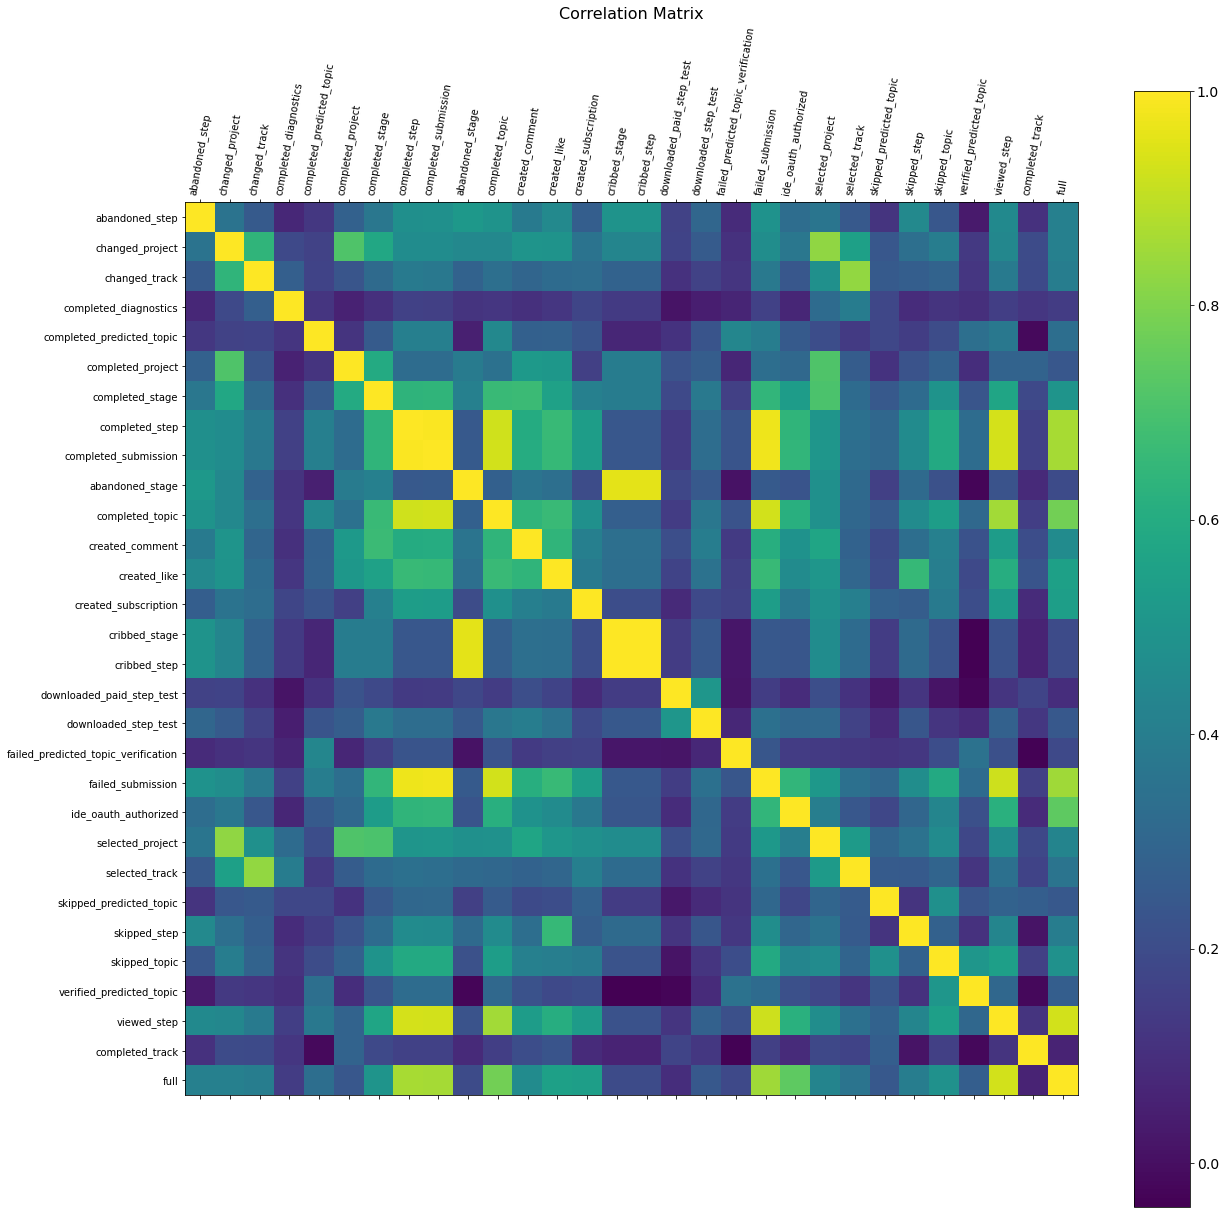

In [86]:
corr = data_pred_act.corr()
#corr[corr < 0.7] = 0
f = plt.figure(figsize=(20, 20))
plt.matshow(corr, fignum=f.number)
plt.xticks(range(data_pred_act.select_dtypes(['number']).shape[1]), data_pred_act.select_dtypes(['number']).columns, fontsize=10, rotation=80)
plt.yticks(range(data_pred_act.select_dtypes(['number']).shape[1]), data_pred_act.select_dtypes(['number']).columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.show()